# Introduction

### This tutorial is to explain the use and demonstrate the use of the microstructure characterisation library

### The data filed for the microstructure images can be found in the folder 'data' and the scripts in the folder 'Scripts'

## Importing libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from Scripts import SpatialCorrelations as corr
from Scripts import plots
from Scripts import hoshenKopleman as hosh
from Scripts import convexity as conv


## Reading and preprocessing image files

In [2]:
image_path ='data/'

In [3]:
path = image_path
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)

# show list of files
print(list_files)

['data/time_010000.dat', 'data/time_010200.dat', 'data/time_010400.dat', 'data/time_010600.dat', 'data/time_010800.dat', 'data/time_011000.dat', 'data/time_011200.dat', 'data/time_011400.dat', 'data/time_011600.dat', 'data/time_011800.dat', 'data/time_012000.dat', 'data/time_012200.dat', 'data/time_012400.dat', 'data/time_012600.dat', 'data/time_012800.dat', 'data/time_013000.dat', 'data/time_013200.dat', 'data/time_013400.dat', 'data/time_013600.dat']


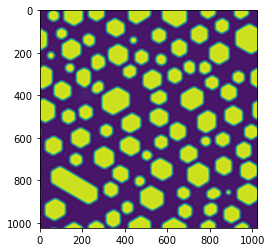

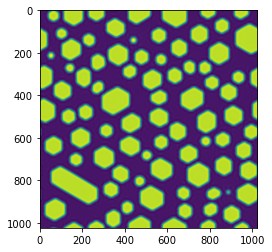

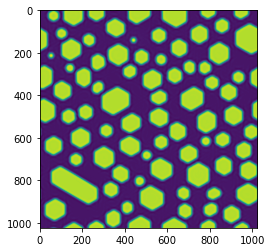

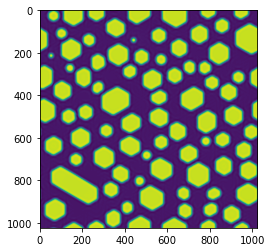

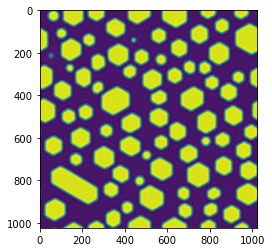

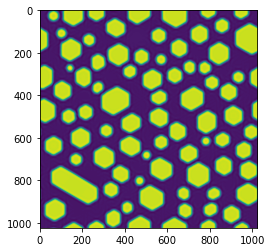

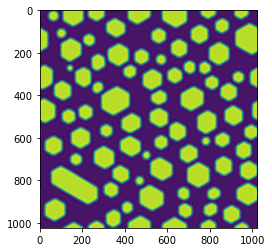

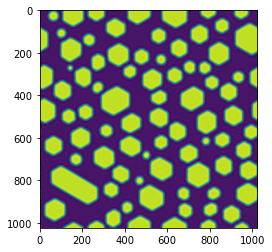

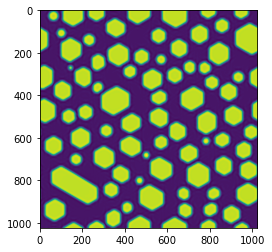

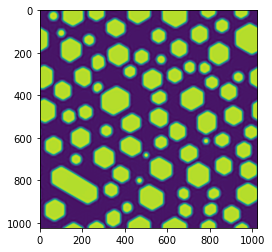

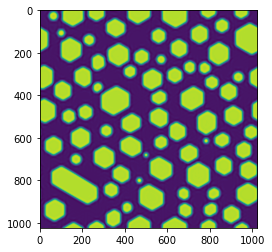

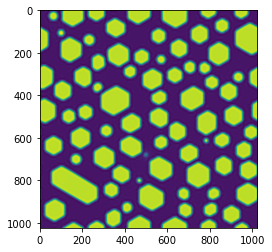

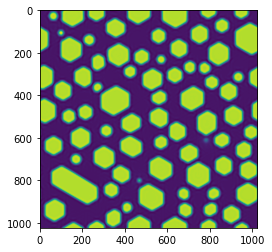

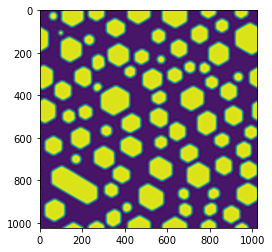

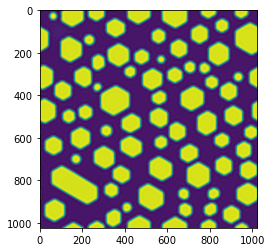

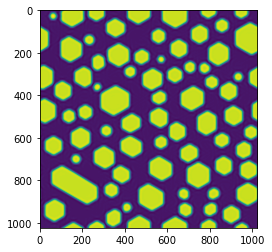

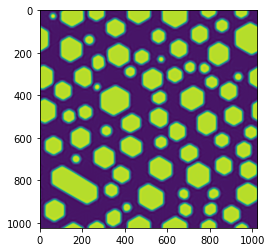

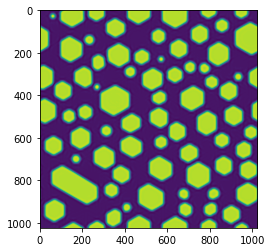

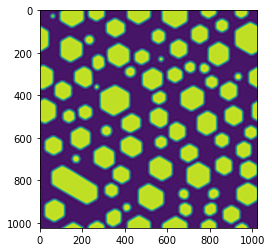

In [4]:
# Show some of the images

for i in list_files:
    img = corr.dat_to_numpy(i)
    plt.imshow(img)
    plt.show()

## Calculating different types of correlations

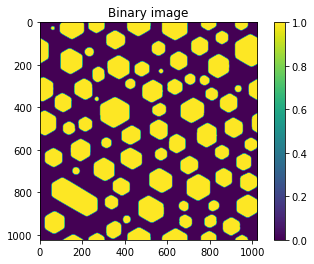

In [5]:
# Binarize the image

img_binary = corr.binarize_image_dat(img)

# show binary image
plt.imshow(img_binary)
plt.colorbar()
plt.title('Binary image')
plt.show()

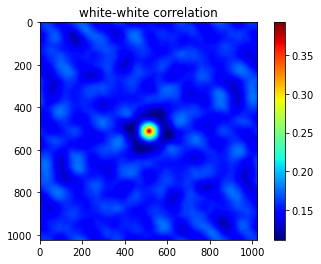

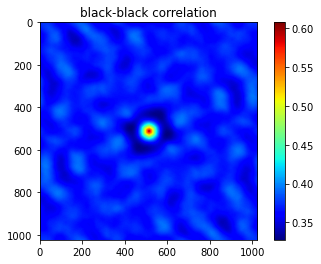

In [6]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.title('white-white correlation')
plt.show()

plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.title('black-black correlation')

plt.show()

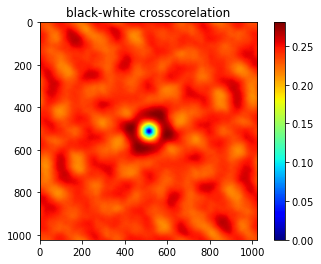

In [7]:
# crosscorrelation

cross = corr.cross_corr_from_code(img_binary)
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.title('black-white crosscorelation')
plt.show()

## Radian Correlations and Angular correlations

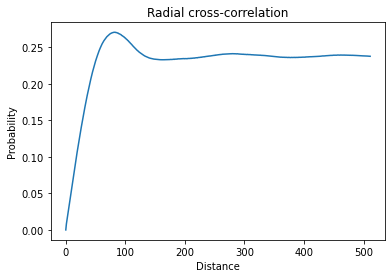

In [8]:
# Let us consider the radial probability distribution based on our previously calculated cross-correlation 'cross'

r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title('Radial cross-correlation')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.show()

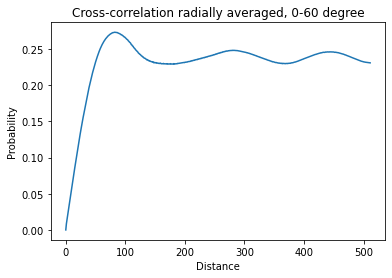

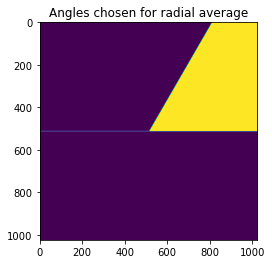

In [9]:
# For angular (0-60 degree), circularally averaged cross-correlation

AngleChosenForOutput, angularProbDistribution =corr.angularDistribution(cross,0,60,0)
plt.plot(angularProbDistribution)
plt.title('Cross-correlation radially averaged, 0-60 degree')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.show()

plt.imshow(AngleChosenForOutput)
plt.title('Angles chosen for radial average')
plt.show()

## Hoshen Kopelman Algorithm

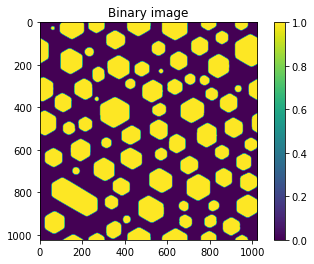

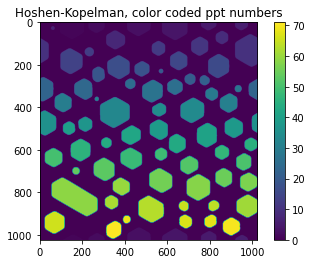

In [10]:
# show binary image
plt.imshow(img_binary)
plt.colorbar()
plt.title('Binary image')
plt.show()

# Cluster the image, Could take ~ 60 sec

labels = hosh.hoshenKoplemanLabels(img_binary)
plt.imshow(labels)
plt.colorbar()
plt.title('Hoshen-Kopelman, color coded ppt numbers')
plt.show()

10


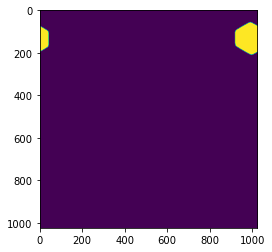

11


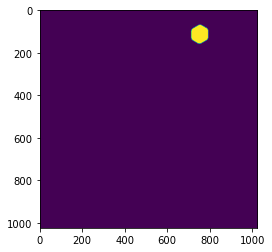

12


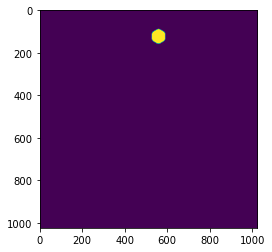

13


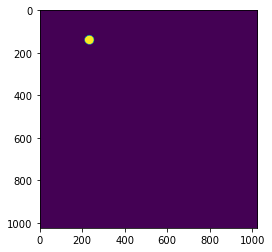

14


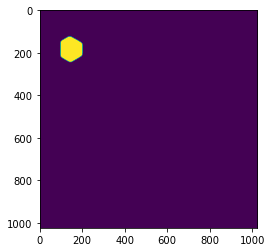

15


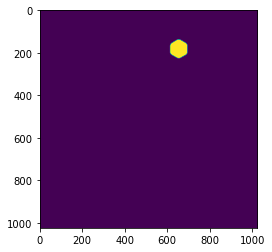

16


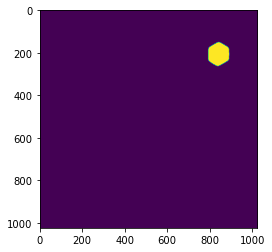

17


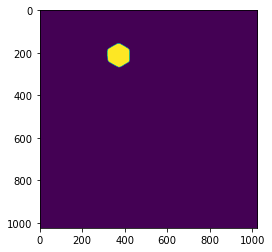

18


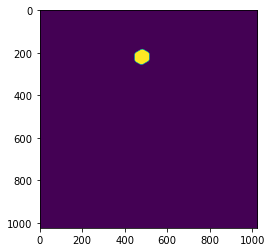

19


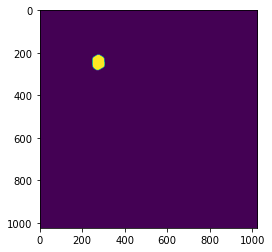

In [11]:
# Show some precipitates
for i in range(10,20):
    print(i)
    plt.imshow((labels==i)*1)
    plt.show()

## Hoshen Kopelman Applications

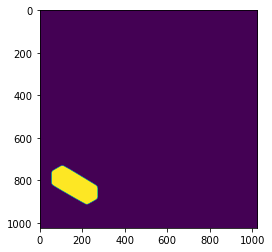

In [12]:
# Selecting a precipitate and showing it

ppt = (labels==59)*1
plt.imshow(ppt)

In [13]:
# Getting centre of gravity of image

cog_x, cog_y = hosh.precipitateCentres(labels, 59)
print('Cog X = ',cog_x,' Cog Y = ',cog_y)

Cog X =  822  Cog Y =  161


In [14]:
# Getting angle of inclination

angle, majorAxis, minorAxis, eigenVector = hosh.angleOfInclination(labels, 59)
print('Angle of inclination =',angle)

Angle of inclination = 30.674885279604933


## Precipitate Tracking Example

total number of ppts : 79


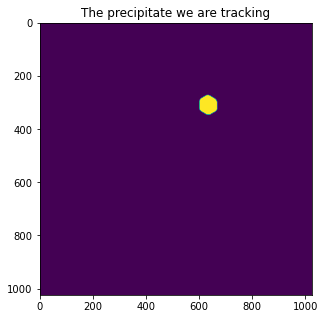

In [15]:
# Selecting precipitate from initial microstructure and displaying it

img_1 = corr.dat_to_numpy(list_files[0])
img_1 = (img_1>0.5)*1
labels = hosh.hoshenKoplemanLabels(img_1)

print('total number of ppts :', np.max(labels))

theChosenOne = 29
plt.rcParams["figure.figsize"] = (5,5)
referenceShape = (labels==theChosenOne)*1

plt.imshow(referenceShape)
plt.title('The precipitate we are tracking')
plt.show()

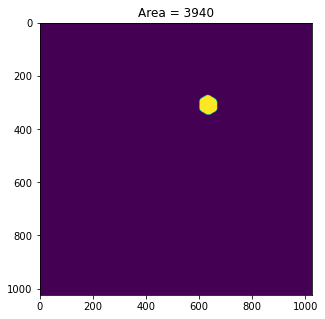

----------------------------------------------------------------------------


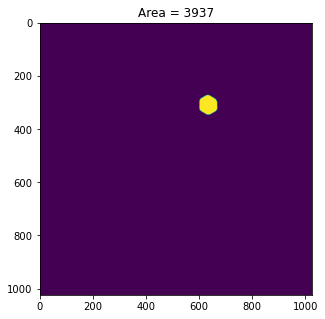

----------------------------------------------------------------------------


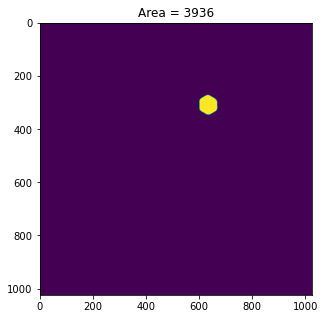

----------------------------------------------------------------------------


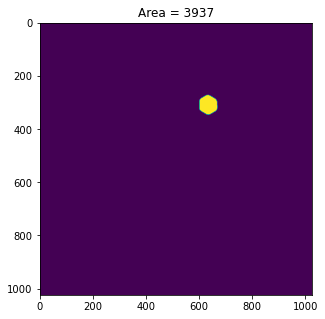

----------------------------------------------------------------------------


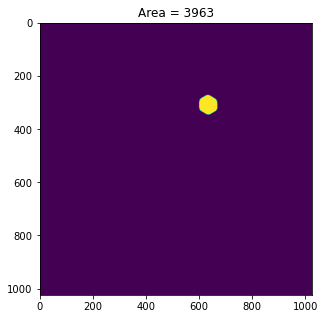

----------------------------------------------------------------------------


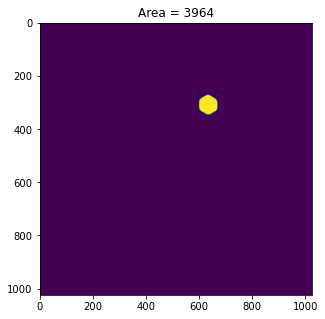

----------------------------------------------------------------------------


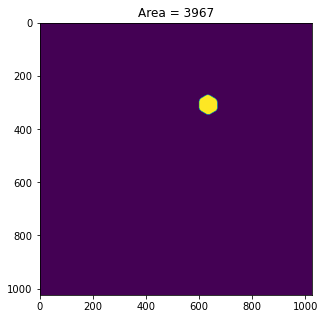

----------------------------------------------------------------------------


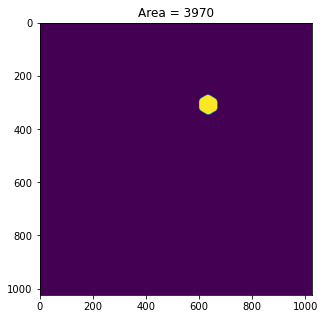

----------------------------------------------------------------------------


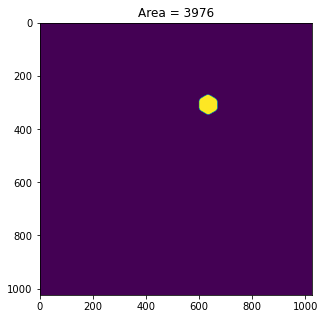

----------------------------------------------------------------------------


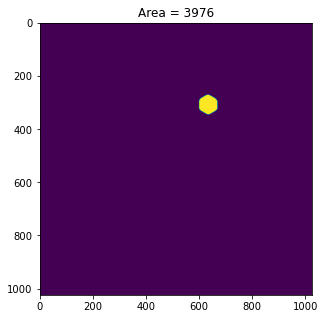

----------------------------------------------------------------------------


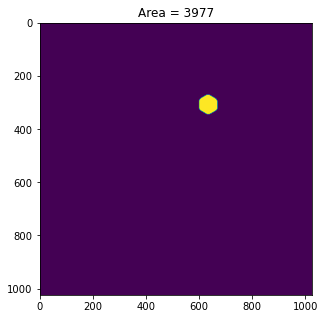

----------------------------------------------------------------------------


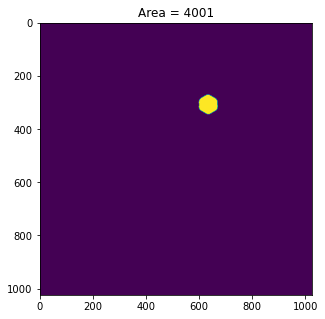

----------------------------------------------------------------------------


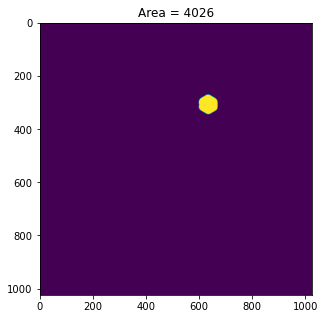

----------------------------------------------------------------------------


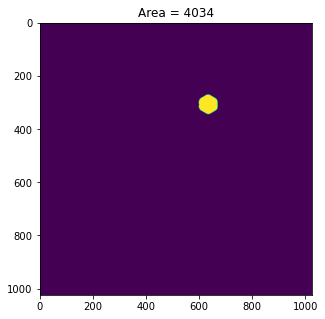

----------------------------------------------------------------------------


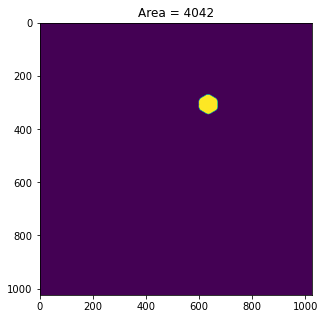

----------------------------------------------------------------------------


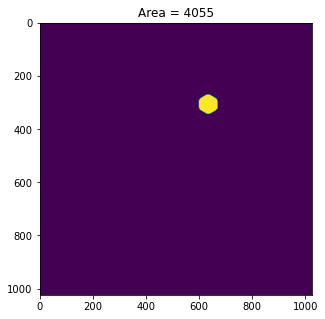

----------------------------------------------------------------------------


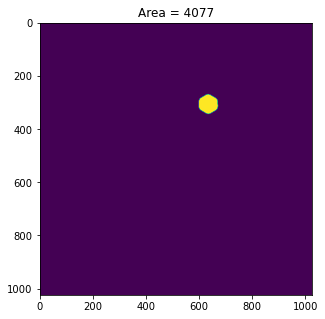

----------------------------------------------------------------------------


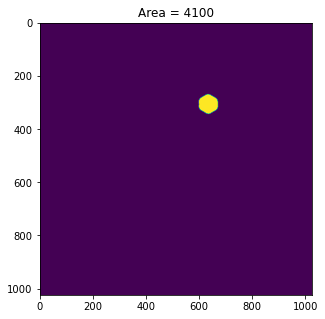

----------------------------------------------------------------------------


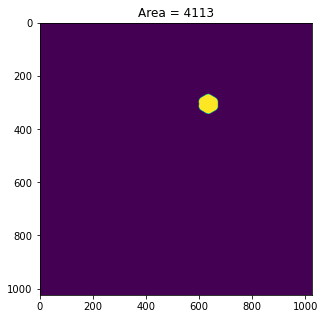

----------------------------------------------------------------------------


In [16]:
# Starting the tracking

for i in range(len(list_files)):
    
    # Binarizing the next time series image
    img_track1 = corr.dat_to_numpy(list_files[i])
    img_track1 = (img_track1>0.5)*1
    
    # Clustering the image to isolate precipitates
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    aaa = referenceShape*labels_track1
    
    # Checking the precipiatate with maximum common area with previous precipitate
    if np.sum(aaa)==0:
        print('the microstructure dissapeared, or moved very quickly')
        break
    label_for_our_ppt = np.median((aaa[aaa != 0]).flatten())
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    
    # Making this precipitate our precipitate to be tracked
    referenceShape = image_tracked1_binary
    
    # Showing the precipitate and the area of precipiate
    plt.imshow(image_tracked1_binary)
    plt.title('Area = '+str(np.sum(image_tracked1_binary)))
    plt.show()
    
    print('----------------------------------------------------------------------------')
    


## Calculate convexity of a single presipitate

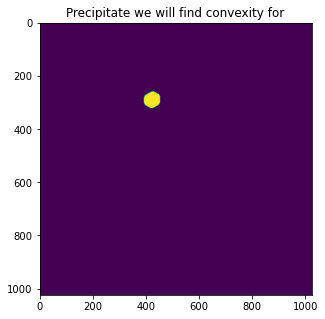

Convexity =  0.99988


In [17]:
# Choosing a precipitate to calculate convexity for

img = corr.dat_to_numpy(list_files[3])
img = (img>0.5)*1
labels = hosh.hoshenKoplemanLabels(img)
precipitate = (labels==27)*1
plt.imshow(precipitate)
plt.title('Precipitate we will find convexity for')
plt.show()

convexity = conv.monteCarloConvexity(precipitate)
print('Convexity = ', convexity)

## Calculating Short Ranged Average Convexity (SRAC) for an image

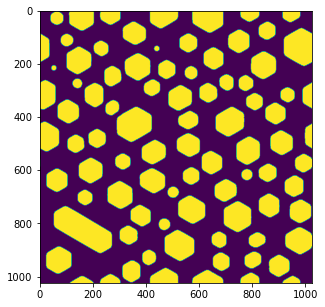

In [18]:
# Choosing image for SRAC calculation
plt.imshow(img)
plt.show()

In [19]:
shrc = conv.shortRangedAverageConvexity(img, parts=4)
print('Short Ranged Average Convexity (SRAC) = ',shrc)

Short Ranged Average Convexity (SRAC) =  0.4184075
